# Masterclass Geopandas

Welkom in deze masterclass! We gaan leren hoe we:
- Python installeren
- Python packages en libraries installeren en importeren
- Files inlezen (geojson, json en shape)
- De bestanden plotten en controleren

Als we er de tijd voor hebben:
- De interpolatie berekening uitvoeren
- Hier een functie van maken
- Van alle bovenstaande stappen een python script maken om het in 1 keer uit te voeren

### Voorbereidingen
- Installeer Anaconda, een package manager voor Python: https://problemsolvingwithpython.com/01-Orientation/01.03-Installing-Anaconda-on-Windows/
- Installeer geopandas and jupyter notebook: https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b
- Openen van Jupyter notebooks: https://problemsolvingwithpython.com/02-Jupyter-Notebooks/02.04-Opening-a-Jupyter-Notebook/#:~:text=Open%20a%20Jupyter%20Notebook%20with%20Anaconda%20Navigator,-One%20additional%20way&text=Open%20Anaconda%20Navigator%20using%20the,%2D%2D%3E%20%5BAnaconda%20Navigator%5D.&text=A%20Jupyter%20file%20browser%20will%20open%20in%20a%20web%20browser%20tab.&text=%3E%20%5BPython%203%5D-,A%20new%20notebook%20will%20open%20as,tab%20in%20your%20web%20browser.
- Installeren van bijkomende packages: 
    - conda install pandas

### Importeren van de benodigde packages

In [1]:
# dit is een code blok in een cel, een regel beginnend met een # is een comment 
# extra info: bij het importeren geeft je een alias aan de library, zodat je die makkelijker kan aanroepen (geopandas wordt gpd)
import geopandas as gpd
import pandas as pd
import os

In [24]:
# Setting all paths!
cwd = os.getcwd()
print(cwd)

wqpointspath = os.path.abspath(os.path.join(cwd, 'data\WQPoints.geojson'))
wqresultspath = os.path.abspath(os.path.join(cwd, 'data\WQResults.json'))
watergang_vlak_path = os.path.abspath(os.path.join(cwd, 'GIS\Watergang Vlak.shp'))
rekenregels_path = os.path.abspath(os.path.join(cwd, 'rekenregels'))
rekenregels_path = os.path.abspath(os.path.join(rekenregels_path, 'rekenregels.json'))


print(wqpointspath)
print(wqresultspath)
print(watergang_vlak_path)
print(rekenregels_path)


C:\GITHUB\klimaatatlas
C:\GITHUB\klimaatatlas\data\WQPoints.geojson
C:\GITHUB\klimaatatlas\data\WQResults.json
C:\GITHUB\klimaatatlas\GIS\Watergang Vlak.shp
C:\GITHUB\klimaatatlas\rekenregels\rekenregels.json


### Inlezen van files

In [26]:
# Laad de rekenregels.json in
import json
with open(rekenregels_path, 'r') as f:
    data = json.load(f)
    
print(data)

{'indicators': [{'name': 'warm_water', 'substance': 'Tmod', 'filters': [{'type': 'consecutive_hours_exceeding_threshold', 'args': [12, 19]}]}, {'name': 'invloed_rwzi', 'substance': 'frac_rwzi', 'filters': [{'type': 'exceeding_threshold', 'args': [0.2]}]}, {'name': 'invloed_riooloverstort', 'substance': 'frac_rio', 'filters': [{'type': 'exceeding_threshold', 'args': [0.1]}]}, {'name': 'warm_en_rwzi', 'logical_operation': {'operand1': 'warm_water', 'operand2': 'invloed_rwzi', 'operator': 'AND'}}, {'name': 'warm_en_overstort', 'logical_operation': {'operand1': 'warm_water', 'operand2': 'invloed_riooloverstort', 'operator': 'AND'}}, {'name': 'risico_botulisme', 'logical_operation': {'operand1': 'warm_en_rwzi', 'operand2': 'warm_en_overstort', 'operator': 'OR'}}], 'statistics': [{'indicator': 'risico_botulisme', 'quantity': 'hours_per_year', 'classes': [{'lowerthreshold': 0, 'upperthreshold': 24, 'result': 'laag'}, {'lowerthreshold': 24, 'upperthreshold': 48, 'result': 'verhoogd'}, {'lowert

In [4]:
# laad de geojson file in met geopandas, door de functie:
gdf_wqpoints = gpd.read_file(wqpointspath)

In [5]:
# Test dit door de bovenste 5 rijen te printen met de gpd.head() functie
gdf_wqpoints.head() # alternatief is gewoon het geodataframe aanroepen:  gdf_wqpoints

,i,idx,geometry
0,0,0,POINT (4.50482 52.09452)
1,1,1,POINT (4.49704 52.12203)
2,2,2,POINT (4.68473 52.01286)
3,3,3,POINT (4.57081 52.30232)
4,4,4,POINT (4.58049 52.30522)


In [6]:
gdf_wqpoints.columns

Index(['i', 'idx', 'geometry'], dtype='object')

<AxesSubplot: >

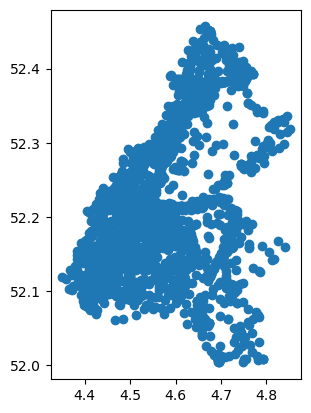

In [7]:
# De inhoud is te zien met de gpd.plot() functie
gdf_wqpoints.plot()

In [8]:
# laad de shape file in met geopandas, door de functie:
# gpd.read_file(r'C:\pad_naar_shapefile\Watergang Vlak.shp')
gdf_watergang_vlak = gpd.read_file(watergang_vlak_path)

<AxesSubplot: >

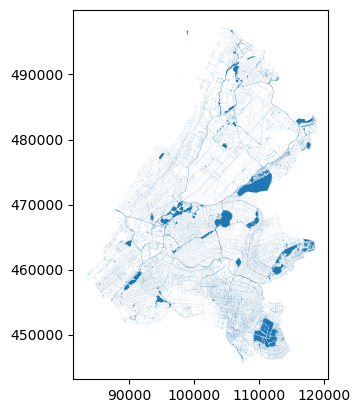

In [11]:
# controleer of het watergang vlak goed is ingeladen
gdf_watergang_vlak.plot()

In [12]:
# als laatste hebben gebruiken we pandas om de WQResults.json in te laden, met de functie:
# pd.read_json(r'C:\pad_naar_jsonfile\WQResults.json')
df_wqresults = pd.read_json(wqresultspath)

In [13]:
# even controleren wat er in het results dataframe zit en of het goed is ingeladen
df_wqresults

,scenarios
0,"{'scenario': 'base', 'SimulationT0': '2014-08-..."


### Berekeningen
- Interessante introductie in berekeningen met geopandas https://geopandas.org/en/stable/getting_started/introduction.html 
- De functie die Brous gebruikte voor het uitrekenen van de waarden was spline with barriers. Hiervoor vond ik volgende tutorial hoe dat in Python uitgevoerd kan worden: https://hatarilabs.com/ih-en/geospatial-triangular-interpolation-with-python-scipy-geopandas-and-rasterio-tutorial
- Als het niet lukt dan heeft arcgis ook nog python modules https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-analyst/spline-with-barriers.htm